In [2]:
%matplotlib inline


Colormap Normalization
======================

Objects that use colormaps by default linearly map the colors in the
colormap from data values *vmin* to *vmax*.  For example::

    pcm = ax.pcolormesh(x, y, Z, vmin=-1., vmax=1., cmap='RdBu_r')

will map the data in *Z* linearly from -1 to +1, so *Z=0* will
give a color at the center of the colormap *RdBu_r* (white in this
case).

Matplotlib does this mapping in two steps, with a normalization from
the input data to [0, 1] occurring first, and then mapping onto the
indices in the colormap.  Normalizations are classes defined in the
:func:`matplotlib.colors` module.  The default, linear normalization
is :func:`matplotlib.colors.Normalize`.

Artists that map data to color pass the arguments *vmin* and *vmax* to
construct a :func:`matplotlib.colors.Normalize` instance, then call it:

.. ipython::

   In [1]: import matplotlib as mpl

   In [2]: norm = mpl.colors.Normalize(vmin=-1.,vmax=1.)

   In [3]: norm(0.)
   Out[3]: 0.5

However, there are sometimes cases where it is useful to map data to
colormaps in a non-linear fashion.

Logarithmic
-----------

One of the most common transformations is to plot data by taking its logarithm
(to the base-10).  This transformation is useful to display changes across
disparate scales.  Using `.colors.LogNorm` normalizes the data via
$log_{10}$.  In the example below, there are two bumps, one much smaller
than the other. Using `.colors.LogNorm`, the shape and location of each bump
can clearly be seen:




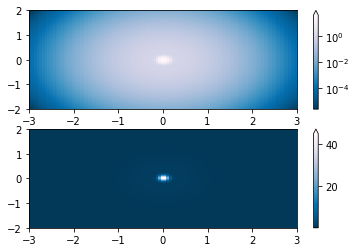

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cbook as cbook

N = 100
X, Y = np.mgrid[-3:3:complex(0, N), -2:2:complex(0, N)]

# A low hump with a spike coming out of the top right.  Needs to have
# z/colour axis on a log scale so we see both hump and spike.  linear
# scale only shows the spike.
Z1 = np.exp(-(X)**2 - (Y)**2)
Z2 = np.exp(-(X * 10)**2 - (Y * 10)**2)
Z = Z1 + 50 * Z2

fig, ax = plt.subplots(2, 1)

pcm = ax[0].pcolor(X, Y, Z,
                   norm=colors.LogNorm(vmin=Z.min(), vmax=Z.max()),
                   cmap='PuBu_r')
fig.colorbar(pcm, ax=ax[0], extend='max')

pcm = ax[1].pcolor(X, Y, Z, cmap='PuBu_r')
fig.colorbar(pcm, ax=ax[1], extend='max')
plt.show()

Symmetric logarithmic
---------------------

Similarly, it sometimes happens that there is data that is positive
and negative, but we would still like a logarithmic scaling applied to
both.  In this case, the negative numbers are also scaled
logarithmically, and mapped to smaller numbers; e.g., if `vmin=-vmax`,
then they the negative numbers are mapped from 0 to 0.5 and the
positive from 0.5 to 1.

Since the logarithm of values close to zero tends toward infinity, a
small range around zero needs to be mapped linearly.  The parameter
*linthresh* allows the user to specify the size of this range
(-*linthresh*, *linthresh*).  The size of this range in the colormap is
set by *linscale*.  When *linscale* == 1.0 (the default), the space used
for the positive and negative halves of the linear range will be equal
to one decade in the logarithmic range.



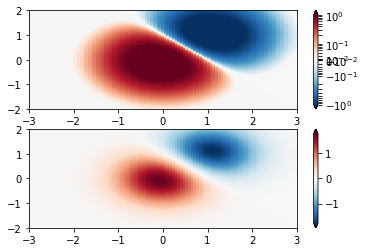

In [4]:
N = 100
X, Y = np.mgrid[-3:3:complex(0, N), -2:2:complex(0, N)]
Z1 = np.exp(-X**2 - Y**2)
Z2 = np.exp(-(X - 1)**2 - (Y - 1)**2)
Z = (Z1 - Z2) * 2

fig, ax = plt.subplots(2, 1)

pcm = ax[0].pcolormesh(X, Y, Z,
                       norm=colors.SymLogNorm(linthresh=0.03, linscale=0.03,
                                              vmin=-1.0, vmax=1.0),
                       cmap='RdBu_r')
fig.colorbar(pcm, ax=ax[0], extend='both')

pcm = ax[1].pcolormesh(X, Y, Z, cmap='RdBu_r', vmin=-np.max(Z))
fig.colorbar(pcm, ax=ax[1], extend='both')
plt.show()

Power-law
---------

Sometimes it is useful to remap the colors onto a power-law
relationship (i.e. $y=x^{\gamma}$, where $\gamma$ is the
power).  For this we use the :func:`colors.PowerNorm`.  It takes as an
argument *gamma* (*gamma* == 1.0 will just yield the default linear
normalization):

<div class="alert alert-info"><h4>Note</h4><p>There should probably be a good reason for plotting the data using
   this type of transformation.  Technical viewers are used to linear
   and logarithmic axes and data transformations.  Power laws are less
   common, and viewers should explicitly be made aware that they have
   been used.</p></div>



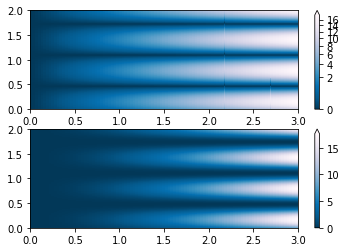

In [5]:
N = 100
X, Y = np.mgrid[0:3:complex(0, N), 0:2:complex(0, N)]
Z1 = (1 + np.sin(Y * 10.)) * X**(2.)

fig, ax = plt.subplots(2, 1)

pcm = ax[0].pcolormesh(X, Y, Z1, norm=colors.PowerNorm(gamma=0.5),
                       cmap='PuBu_r')
fig.colorbar(pcm, ax=ax[0], extend='max')

pcm = ax[1].pcolormesh(X, Y, Z1, cmap='PuBu_r')
fig.colorbar(pcm, ax=ax[1], extend='max')
plt.show()

Discrete bounds
---------------

Another normaization that comes with Matplotlib is
:func:`colors.BoundaryNorm`.  In addition to *vmin* and *vmax*, this
takes as arguments boundaries between which data is to be mapped.  The
colors are then linearly distributed between these "bounds".  For
instance:

.. ipython::

  In [2]: import matplotlib.colors as colors

  In [3]: bounds = np.array([-0.25, -0.125, 0, 0.5, 1])

  In [4]: norm = colors.BoundaryNorm(boundaries=bounds, ncolors=4)

  In [5]: print(norm([-0.2,-0.15,-0.02, 0.3, 0.8, 0.99]))
  [0 0 1 2 3 3]

Note unlike the other norms, this norm returns values from 0 to *ncolors*-1.



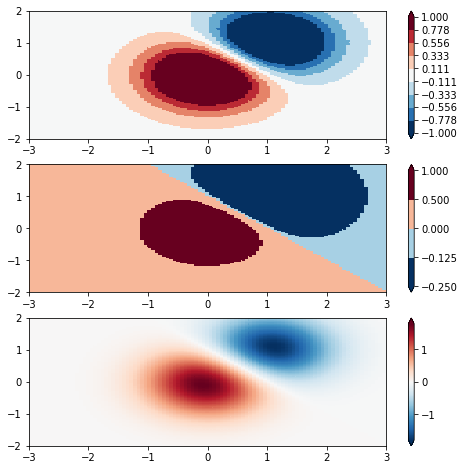

In [6]:
N = 100
X, Y = np.mgrid[-3:3:complex(0, N), -2:2:complex(0, N)]
Z1 = np.exp(-X**2 - Y**2)
Z2 = np.exp(-(X - 1)**2 - (Y - 1)**2)
Z = (Z1 - Z2) * 2

fig, ax = plt.subplots(3, 1, figsize=(8, 8))
ax = ax.flatten()
# even bounds gives a contour-like effect
bounds = np.linspace(-1, 1, 10)
norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)
pcm = ax[0].pcolormesh(X, Y, Z,
                       norm=norm,
                       cmap='RdBu_r')
fig.colorbar(pcm, ax=ax[0], extend='both', orientation='vertical')

# uneven bounds changes the colormapping:
bounds = np.array([-0.25, -0.125, 0, 0.5, 1])
norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)
pcm = ax[1].pcolormesh(X, Y, Z, norm=norm, cmap='RdBu_r')
fig.colorbar(pcm, ax=ax[1], extend='both', orientation='vertical')

pcm = ax[2].pcolormesh(X, Y, Z, cmap='RdBu_r', vmin=-np.max(Z))
fig.colorbar(pcm, ax=ax[2], extend='both', orientation='vertical')
plt.show()

DivergingNorm: Different mapping on either side of a center
-----------------------------------------------------------

Sometimes we want to have a different colormap on either side of a
conceptual center point, and we want those two colormaps to have
different linear scales.  An example is a topographic map where the land
and ocean have a center at zero, but land typically has a greater
elevation range than the water has depth range, and they are often
represented by a different colormap.



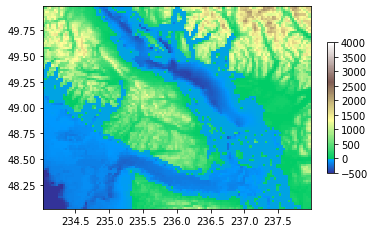

In [7]:
filename = cbook.get_sample_data('topobathy.npz', asfileobj=False)
with np.load(filename) as dem:
    topo = dem['topo']
    longitude = dem['longitude']
    latitude = dem['latitude']

fig, ax = plt.subplots()
# make a colormap that has land and ocean clearly delineated and of the
# same length (256 + 256)
colors_undersea = plt.cm.terrain(np.linspace(0, 0.17, 256))
colors_land = plt.cm.terrain(np.linspace(0.25, 1, 256))
all_colors = np.vstack((colors_undersea, colors_land))
terrain_map = colors.LinearSegmentedColormap.from_list('terrain_map',
    all_colors)

# make the norm:  Note the center is offset so that the land has more
# dynamic range:
divnorm = colors.DivergingNorm(vmin=-500., vcenter=0, vmax=4000)

pcm = ax.pcolormesh(longitude, latitude, topo, rasterized=True, norm=divnorm,
    cmap=terrain_map,)
# Simple geographic plot, set aspect ratio beecause distance between lines of
# longitude depends on latitude.
ax.set_aspect(1 / np.cos(np.deg2rad(49)))
fig.colorbar(pcm, shrink=0.6)
plt.show()

Custom normalization: Manually implement two linear ranges
----------------------------------------------------------

The `.DivergingNorm` described above makes a useful example for
defining your own norm.



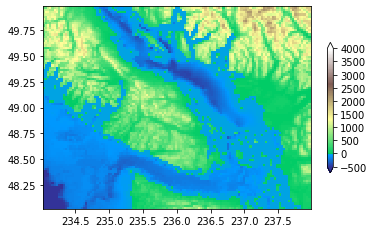

In [8]:
class MidpointNormalize(colors.Normalize):
    def __init__(self, vmin=None, vmax=None, vcenter=None, clip=False):
        self.vcenter = vcenter
        colors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        # I'm ignoring masked values and all kinds of edge cases to make a
        # simple example...
        x, y = [self.vmin, self.vcenter, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))


fig, ax = plt.subplots()
midnorm = MidpointNormalize(vmin=-500., vcenter=0, vmax=4000)

pcm = ax.pcolormesh(longitude, latitude, topo, rasterized=True, norm=midnorm,
    cmap=terrain_map)
ax.set_aspect(1 / np.cos(np.deg2rad(49)))
fig.colorbar(pcm, shrink=0.6, extend='both')
plt.show()